In [22]:
'''
@Author: Venkatesh <br>
@Date: 2024-11-16  <br>
@Last Modified by: Venkatesh <br>
@Last Modified time: 2024-11-10 <br>
@Title: KNN  <br>

'''

'\n@Author: Venkatesh <br>\n@Date: 2024-11-16  <br>\n@Last Modified by: Venkatesh <br>\n@Last Modified time: 2024-11-10 <br>\n@Title: KNN  <br>\n\n'

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 
    'marital_status', 'occupation', 'relationship', 'race', 'sex', 
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

# Read the CSV file without headers and assign column names
dataset = pd.read_csv('Salary_Data.csv', header=None, names=column_names,na_values=[' ?'])

print(dataset.info())

categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for column in categorical_columns:
    mode_value = dataset[column].mode()[0]
    dataset[column].fillna(mode_value, inplace=True)

dataset.info()
print(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns

C:\Users\Venkatesh Bingi\AppData\Local\Temp\ipykernel_23448\4198921583.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(mode_value, inplace=True)


Encoding the values

In [25]:
salary_predict = dataset[['workclass','education','marital_status']]
salary_predict

label_encoder = LabelEncoder()

for column in salary_predict.columns:
    salary_predict[column] = label_encoder.fit_transform(salary_predict[column])

# Display the encoded DataFrame
print(salary_predict)

dataset['income'] = label_encoder.fit_transform(dataset['income'])
dataset['income'].head(10)

       workclass  education  marital_status
0              6          9               4
1              5          9               2
2              3         11               0
3              3          1               2
4              3          9               2
...          ...        ...             ...
32556          3          7               2
32557          3         11               2
32558          3         11               6
32559          3         11               4
32560          4         11               2

[32561 rows x 3 columns]


C:\Users\Venkatesh Bingi\AppData\Local\Temp\ipykernel_23448\1075386981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_predict[column] = label_encoder.fit_transform(salary_predict[column])
C:\Users\Venkatesh Bingi\AppData\Local\Temp\ipykernel_23448\1075386981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_predict[column] = label_encoder.fit_transform(salary_predict[column])
C:\Users\Venkatesh Bingi\AppData\Local\Temp\ipykernel_23448\1075386981.py:7: SettingWithCopyWarning: 
A value is

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

Splitting the data

In [26]:
feature = salary_predict
target = dataset['income']

Choosing the model

In [27]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.4,random_state=42)

scaling = StandardScaler()
x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)

model = KNeighborsClassifier(n_neighbors=9,p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

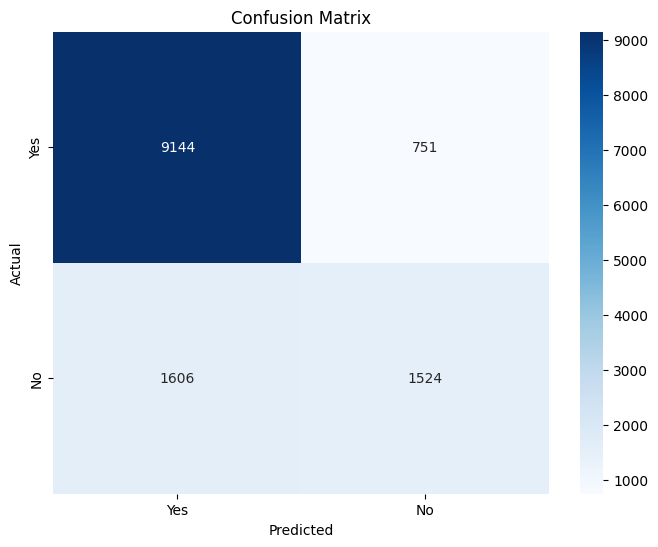

In [28]:
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score 0.8190403071017275
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      9895
           1       0.67      0.49      0.56      3130

    accuracy                           0.82     13025
   macro avg       0.76      0.71      0.72     13025
weighted avg       0.81      0.82      0.81     13025



In [30]:
y_prob= model.predict_proba(x_test)[:,1]
print(y_prob)

false_positive_rate ,true_positive_rate,threshold = roc_curve(y_test,y_prob)
print(threshold)

roc_auc =auc(false_positive_rate,true_positive_rate)
print(roc_auc)

[0.11111111 0.55555556 0.77777778 ... 0.55555556 0.77777778 0.11111111]
[       inf 1.         0.88888889 0.77777778 0.66666667 0.55555556
 0.44444444 0.33333333 0.22222222 0.11111111 0.        ]
0.8277970608320271


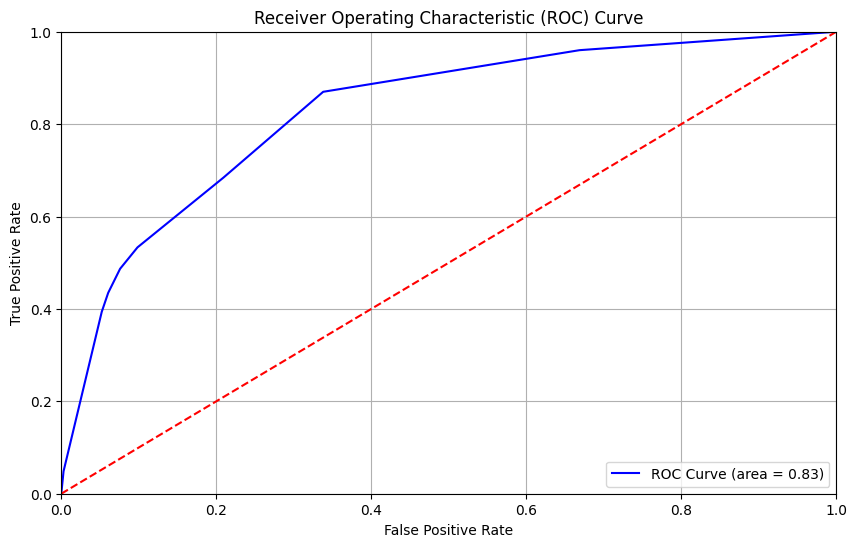

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()